## `k-means` clustering on the Iris dataset using Python's scikit-learn library:

## Step 1: Loading libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data # create only input data not target

In [3]:
# Create a DataFrame from the Iris dataset (for visualization purpose only)
df = pd.DataFrame(X, columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


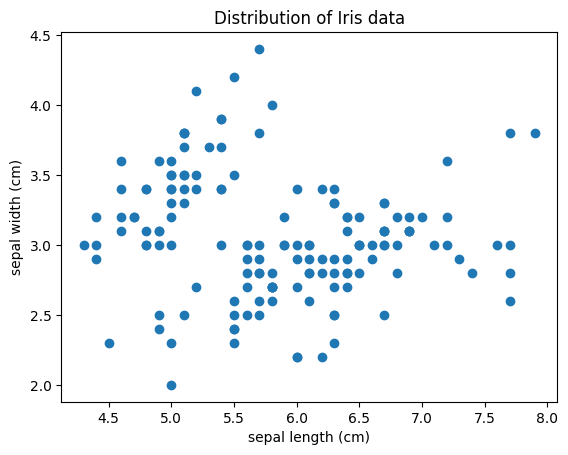

In [5]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Distribution of Iris data')
plt.show()

# Finding the best value of k using elbow method

In [6]:
# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# here inertia calculate sum of square distance in each cluster


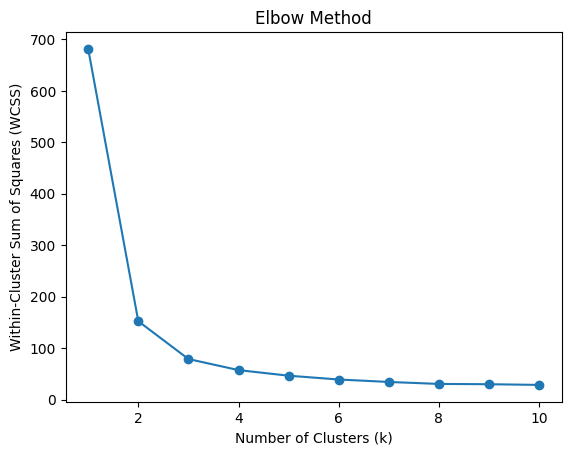

In [7]:
# Plot the within-cluster sum of squares for different values of k
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

## Using Gridsearch method

In [8]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create a KMeans object
kmeans = KMeans(n_init='auto',random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Perform grid search
grid_search.fit(X)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_



In [9]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_clusters': 6}
Best Score: -13.009288877484618


## Implementing K-means clustering

In [10]:
# Perform k-means clustering
k = 6 # Number of clusters
kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

## Extracting labels and cluster centers

In [11]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels



In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,1


## Visualizing the clustering using first two features

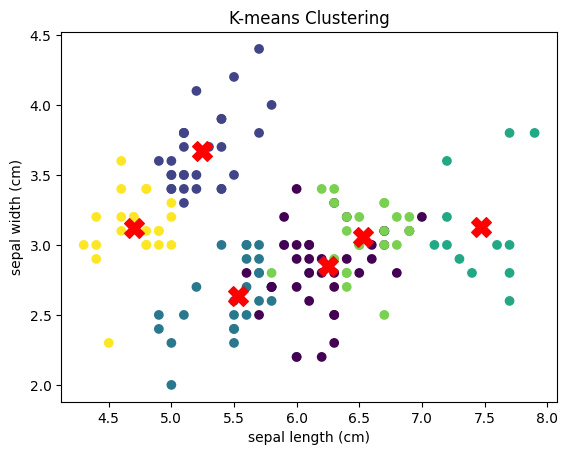

In [13]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering')
plt.show()

In [14]:
df.head()# displaying the data with new label-Cluster

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,1


>*Conclusion:* Clustering is not a good option to label the iris dataset using input features.